## Added 2-D and 3-D figures

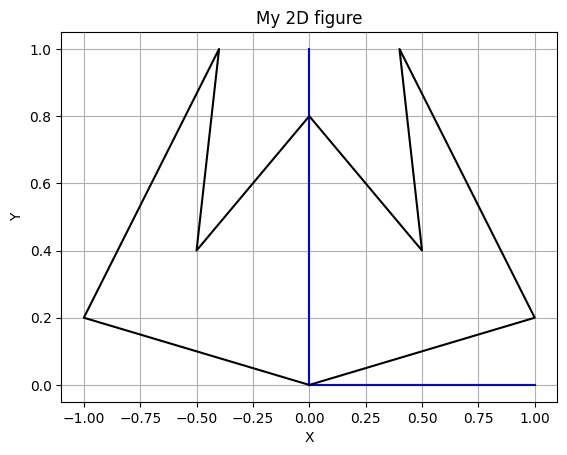

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy._typing import NDArray


def print_figure(figure):
    x = figure[:, 0]
    y = figure[:, 1]
    if figure.ndim == 2 and figure.shape[1] != 3:
        plt.plot([0, 1], [0, 0], color="blue")
        plt.plot([0, 0], [0, 1], color="blue")
        plt.plot(x, y, color="black")
        plt.title('My 2D figure')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.grid(True)
        plt.show()

    elif figure.ndim == 2 and figure.shape[1] == 3:
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        x = figure[:, 0]
        y = figure[:, 1]
        z = figure[:, 2]

        ax.plot([0, 1], [0, 0], [0, 0], color="blue")
        ax.plot([0, 0], [0, 1], [0, 0], color="blue")
        ax.plot([0, 0], [0, 0], [0, 1], color="blue")

        faces = np.array([
            [0, 1, 4],
            [1, 2, 4],
            [2, 3, 4],
            [3, 0, 4],
            [0, 1, 2],
            [0, 2, 3]
        ])

        ax.plot_trisurf(x, y, z, triangles=faces, cmap='viridis', edgecolor='red', alpha=0.8)

        ax.set_title('My 3D figure')

        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        plt.show()


batman = np.array([[0, 0], [1, 0.2], [0.4, 1], [0.5, 0.4], [0, 0.8], [-0.5, 0.4], [-0.4, 1], [-1, 0.2], [0, 0]])
pyramid = np.array([
    [0, 0, 0],
    [1, 0, 0],
    [1, 1, 0],
    [0, 1, 0],
    [0.5, 0.5, 1]
])
print_figure(batman)

## Added rotation

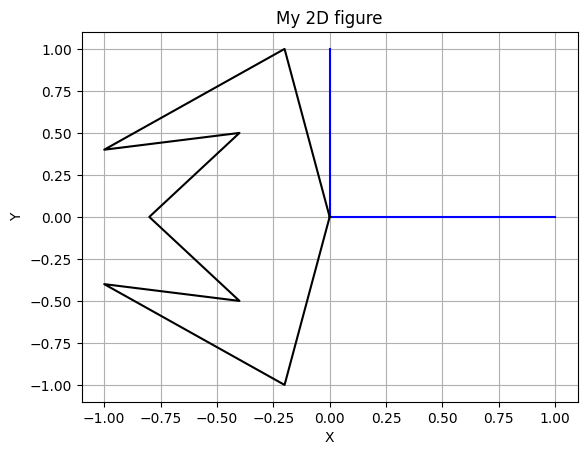

In [8]:
def rotation(figure: NDArray[float], rotation_degree, if_counterclockwise, axis_to_rotate: str = "x") -> NDArray[float]:
    rotation_radians = np.radians(rotation_degree)

    rotational_matrix = np.array([
        [np.cos(rotation_radians), -np.sin(rotation_radians)],
        [np.sin(rotation_radians), np.cos(rotation_radians)]
    ])

    rotate_x = np.array([
        [1, 0, 0],
        [0, np.cos(rotation_radians), -np.sin(rotation_radians)],
        [0, np.sin(rotation_radians), np.cos(rotation_radians)]
    ])

    rotate_y = np.array([
        [np.cos(rotation_radians), 0, np.sin(rotation_radians)],
        [0, 1, 0],
        [-np.sin(rotation_radians), 0, np.cos(rotation_radians)]
    ])

    rotate_z = np.array([
        [np.cos(rotation_radians), -np.sin(rotation_radians), 0],
        [np.sin(rotation_radians), np.cos(rotation_radians), 0],
        [0, 0, 1]
    ])

    if figure.ndim == 2 and figure.shape[1] == 3:
        if axis_to_rotate == "x":
            rotational_matrix = rotate_y
        elif axis_to_rotate == "y":
            rotational_matrix = rotate_z
        elif axis_to_rotate == "z":
            rotational_matrix = rotate_x

    if if_counterclockwise:
        resulted_matrix = []
        for vector in figure:
            rotated_vector = np.dot(rotational_matrix, vector)
            resulted_matrix.append(rotated_vector)

        return np.array(resulted_matrix)
    else:
        return np.dot(figure, rotational_matrix)


rotated_matrix = rotation(batman, 90, True)

print_figure(rotated_matrix)

## Added reflection matrix

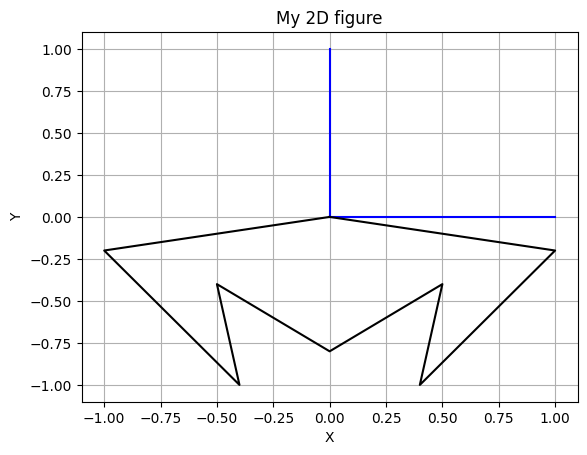

In [3]:
reflection_matrix = np.array([
    [1, 0],
    [0, -1]
])

print_figure(np.dot(batman, reflection_matrix))

## Added scaling

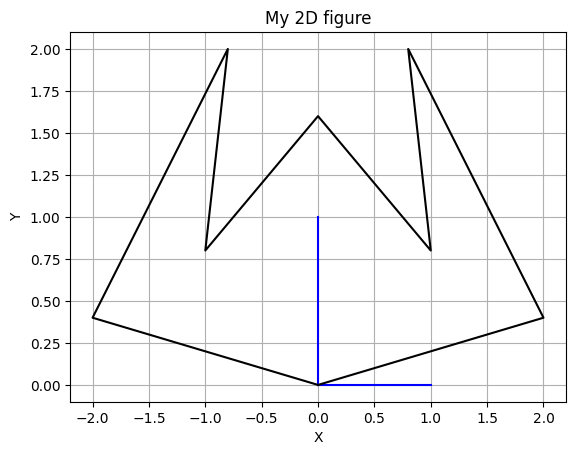

In [4]:
def scaling(figure, scale):
    scaling_matrix = np.array([
        [scale, 0],
        [0, scale]
    ])

    return np.dot(figure, scaling_matrix)


scaled_figure = scaling(batman, 2)
print_figure(scaled_figure)

## Added axis rate and custom transformation

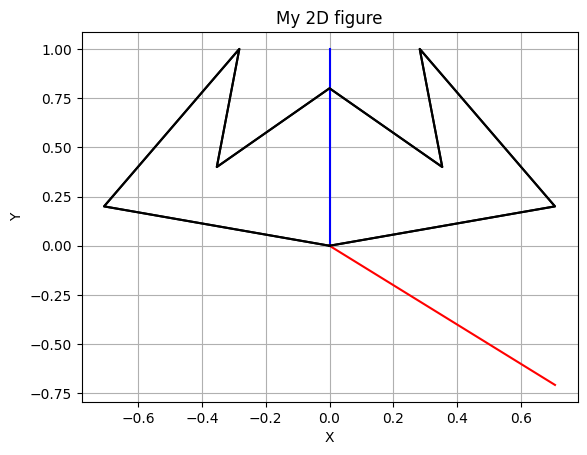

In [6]:
def print_axis(axis, axis_name, figure: NDArray[float] = 0):
    coordinate_system = np.array([])
    if axis.shape[0] != 3:
        if axis_name == "x":
            plt.plot([0, 0], [0, 1], color="blue")
            coordinate_system = np.array([[axis[0], 0], [0, 1]])
        elif axis_name == "y":
            plt.plot([0, 1], [0, 0], color="blue")
            coordinate_system = np.array([[1, 0], [0, axis[1]]])

        if figure is not None:
            new_figure = np.dot(figure, coordinate_system)
            x = new_figure[:, 0]
            y = new_figure[:, 1]
            plt.plot(x, y, color="black")

        plt.plot([0, axis[0]], [0, axis[1]], color="red")

        new_figure = to_transform(coordinate_system, figure)
        x = new_figure[:, 0]
        y = new_figure[:, 1]

        plt.plot(x, y, color="black")
        plt.title('My 2D figure')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.grid(True)
        plt.show()

    elif axis.shape[0] == 3:
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')

        if axis_name == "x":
            ax.plot([0, 0], [0, 1], [0, 0], color="blue")
            ax.plot([0, 0], [0, 0], [0, 1], color="blue")
        elif axis_name == "y":
            ax.plot([0, 1], [0, 0], [0, 0], color="blue")
            ax.plot([0, 0], [0, 0], [0, 1], color="blue")
        else:
            ax.plot([0, 1], [0, 0], [0, 0], color="blue")
            ax.plot([0, 0], [0, 1], [0, 0], color="blue")

        ax.plot([0, axis[0]], [0, axis[1]], [0, axis[2]], color="red")

        if figure is not None:
            x = figure[:, 0]
            y = figure[:, 1]
            z = figure[:, 2]

            faces = np.array([
                [0, 1, 4],
                [1, 2, 4],
                [2, 3, 4],
                [3, 0, 4],
                [0, 1, 2],
                [0, 2, 3]
            ])

            ax.plot_trisurf(x, y, z, triangles=faces, cmap='viridis', edgecolor='red', alpha=0.8)

        ax.set_title('My 3D figure')
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        plt.show()


def to_transform(transformational_matrix, origin):
    result = []
    for vector in origin:
        rotated_vector = np.dot(transformational_matrix, vector)
        result.append(rotated_vector)

    return np.array(result)
    

axis_to_transform = np.array([1, 0])
rotated_axis = rotation(axis_to_transform, 45, False)
print_axis(rotated_axis, "x", batman)

## Transformation with 3D object

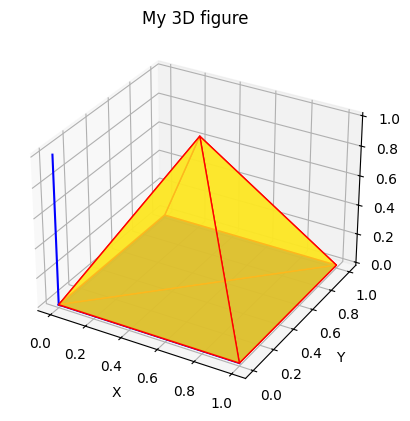

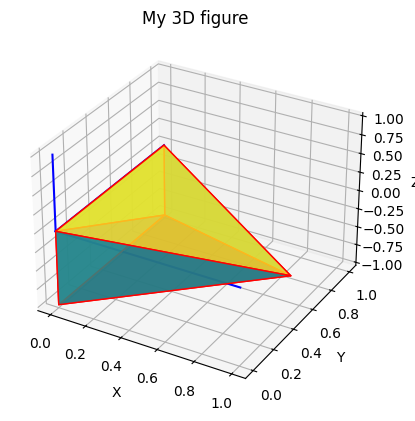

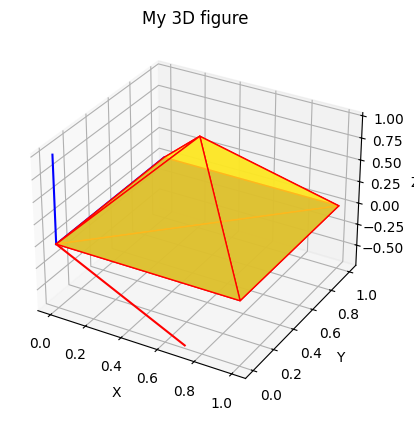

In [10]:
print_figure(pyramid)

rotated_pyramid = rotation(pyramid, 90, True, "x")
print_figure(rotated_pyramid)

axis_to_transform = np.array([1, 0, 0])
new_axis = rotation(np.array([axis_to_transform]), 45, True, "x").flatten()
print_axis(new_axis, "x", pyramid)